<a href="https://colab.research.google.com/github/tanvirtaher32/Sarcasm-Detection/blob/main/Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Accuracy: 0.8482949752982287
Confusion Matrix:
[[8012  995]
 [1523 6068]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      9007
           1       0.86      0.80      0.83      7591

    accuracy                           0.85     16598
   macro avg       0.85      0.84      0.85     16598
weighted avg       0.85      0.85      0.85     16598



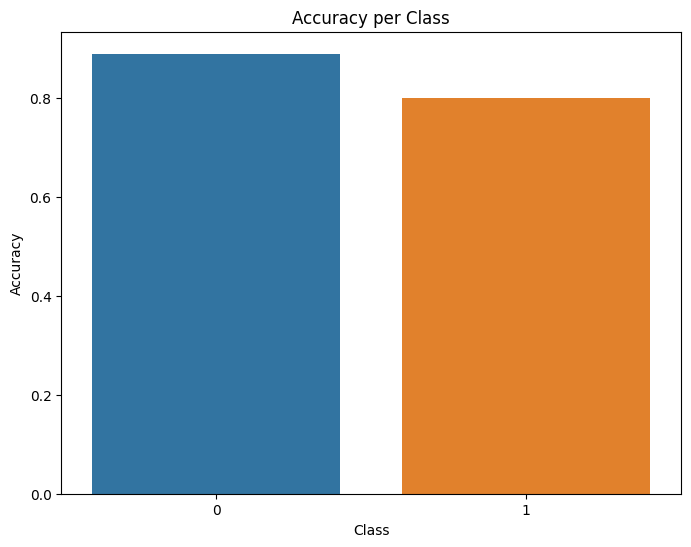

In [ ]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Load the dataset
data_1 = pd.read_json("/content/drive/MyDrive/testdata/Sarcasm_Headlines_Dataset.json", lines=True)
data_2 = pd.read_json("/content/drive/MyDrive/testdata/Sarcasm_Headlines_Dataset_v2.json", lines=True)
data = pd.concat([data_1, data_2])

# Clean the text
def clean_text(text):
    text = text.lower()

    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x: x[0] != '@', text.split()))

    emoji = re.compile("["
                       u"\U0001F600-\U0001FFFF"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

data["headline"] = data["headline"].apply(clean_text)

# Tokenize the headlines
def tokenize_headlines(df):
    headlines = df["headline"].values.tolist()
    tokenized_headlines = [nltk.word_tokenize(headline) for headline in headlines]
    return tokenized_headlines

headlines = tokenize_headlines(data)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Convert headlines to TF-IDF features
X = vectorizer.fit_transform([" ".join(headline) for headline in headlines]).toarray()

# Split the data into train and test sets
validation_split = 0.3
num_validation_samples = int(validation_split * X.shape[0])
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = data['is_sarcastic'].values[indices]
X_train = X[:-num_validation_samples]
y_train = y[:-num_validation_samples]
X_test = X[-num_validation_samples:]
y_test = y[-num_validation_samples:]

# Train the Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print('Confusion Matrix:')
print(confusion_matrix)
print("Classification Report:")
print(classification_report)

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the accuracy for each class
accuracy_per_class = []
for class_label in np.unique(y_test):
    class_indices = np.where(y_test == class_label)[0]
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    accuracy_per_class.append(class_accuracy)

# Create a bar plot to visualize the accuracy per class
plt.figure(figsize=(8, 6))
sns.barplot(x=np.unique(y_test), y=accuracy_per_class)
plt.title('Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()




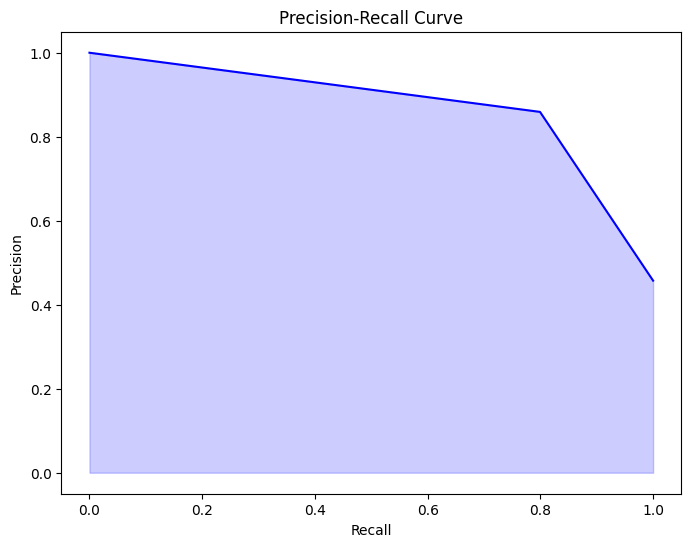

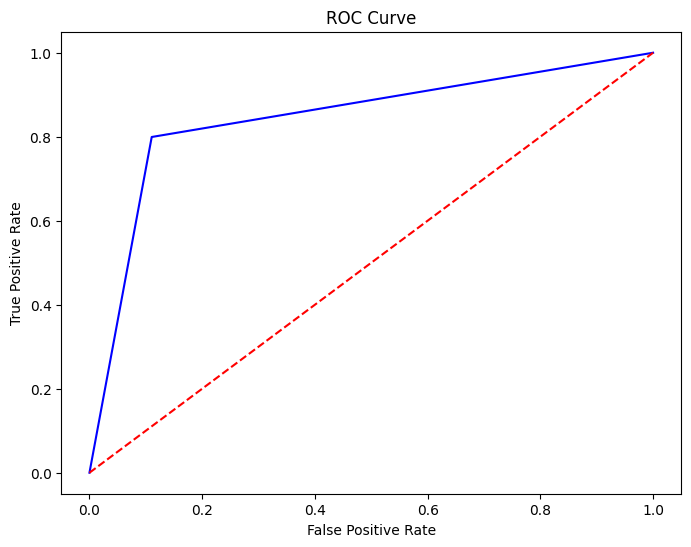

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve

# Rest of the code...

# Plotting the Precision-Recall Curve
def plot_precision_recall_curve(y_test, y_pred):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b')
    plt.fill_between(recall, precision, color='b', alpha=0.2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Plotting the ROC Curve
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b')
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# Generate the plots
# plot_confusion_matrix(confusion_matrix)
plot_precision_recall_curve(y_test, y_pred)
plot_roc_curve(y_test, y_pred)
